In [1]:
from __future__ import print_function, division
import os
import numpy as np
from numpy.random import randn
import pylab as pl
from pandas import Series, DataFrame
import pandas 
import pandas as pd
import re
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import urllib.request

In [2]:
%pylab inline
np.set_printoptions(precision=4, threshold=500)
np.random.seed(123321)
pl.rc('figure', figsize=(10,6))
pd.options.display.max_rows = 100

Populating the interactive namespace from numpy and matplotlib


In [3]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})

In [4]:
df2 = DataFrame({'key': ['a', 'b', 'c'], 'data2': range(3)})

In [5]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [6]:
df2

,key,data2
0,a,0
1,b,1
2,c,2


In [7]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,2


In [8]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,2


In [9]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})

In [10]:
df4 = DataFrame({'rkey': ['a', 'b', 'd'], 'data2': range(3)})

In [11]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [12]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,2


In [13]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})

In [14]:
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'], 'data2': range(5)})

In [15]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [16]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [17]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [18]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [19]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'], 'key2': ['one', 'two', 'one'], 'lval': [1, 2, 3]})

In [20]:
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'], 'key2': ['one', 'one', 'one', 'two'], 'rval': [4, 5, 6, 7]})

In [21]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [22]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [23]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


Merging on Index

In [24]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'], 'value': range(6)})

In [25]:
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [26]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [27]:
right1

,group_val
a,3.5
b,7.0


In [28]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [29]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [30]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 'key2': [2000, 2001, 2002, 2001, 2002], 'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)), index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'], [2001, 2000, 2000, 2000, 2001, 2002]], columns=['event1', 'event2'])

In [31]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [32]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [33]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [34]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [35]:
left2 = DataFrame([[1.,2.], [3.,4.], [5.,6.]], index=('a', 'c', 'e'), columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7.,8.], [9.,10.], [11.,12.], [13,14]], index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [36]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [37]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [38]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [39]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [40]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [41]:
another = DataFrame([[7.,8.], [9.,10.], [11.,12.], [16.,17.]], index=['a','c','e','f'], columns=['New York', 'Oregon'])

In [42]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [43]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [44]:
left.join([right2, another], how='outer')

C:\Users\Sheba\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)


,key1,key2,lval,Missouri,Alabama,New York,Oregon
0,foo,one,1.0,NaN,NaN,NaN,NaN
1,foo,two,2.0,NaN,NaN,NaN,NaN
2,bar,one,3.0,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,7.0,8.0,NaN,NaN
c,NaN,NaN,NaN,9.0,10.0,9.0,10.0
d,NaN,NaN,NaN,11.0,12.0,NaN,NaN
e,NaN,NaN,NaN,13.0,14.0,11.0,12.0
a,NaN,NaN,NaN,NaN,NaN,7.0,8.0
f,NaN,NaN,NaN,NaN,NaN,16.0,17.0


In [45]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [46]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [47]:
s1 = Series([0,1], index=['a', 'b'])
s2 = Series([2,3,4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [48]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [49]:
pd.concat([s1, s2, s3], axis=1)

C:\Users\Sheba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [50]:
s4 = pd.concat([s1 * 5, s3])

In [51]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [52]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [53]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [54]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [55]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

C:\Users\Sheba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [56]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'], columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

C:\Users\Sheba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [57]:
pd.concat({'level1': df1, 'level2': df2}, axis=1, sort=True)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [58]:
pd.concat([df1,df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'], sort=True)

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [59]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1

,a,b,c,d
0,0.905201,-0.621669,1.267844,-1.381850
1,-0.548407,0.340444,1.370516,0.454167
2,0.865425,0.300580,0.376308,-1.514473


In [60]:
df2

,b,d,a
0,0.999249,0.610440,-0.554306
1,-1.097507,-1.622026,-0.020096


In [61]:
pd.concat([df1, df2], sort=True)

,a,b,c,d
0,0.905201,-0.621669,1.267844,-1.381850
1,-0.548407,0.340444,1.370516,0.454167
2,0.865425,0.300580,0.376308,-1.514473
0,-0.554306,0.999249,NaN,0.610440
1,-0.020096,-1.097507,NaN,-1.622026


In [62]:
pd.concat([df1, df2], ignore_index=True, sort=True)

,a,b,c,d
0,0.905201,-0.621669,1.267844,-1.381850
1,-0.548407,0.340444,1.370516,0.454167
2,0.865425,0.300580,0.376308,-1.514473
3,-0.554306,0.999249,NaN,0.610440
4,-0.020096,-1.097507,NaN,-1.622026


Combining Data with Overlap

In [63]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index=['f','e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64), index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [64]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [65]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [66]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [67]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [68]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan], 
                  'b': [np.nan, 2., np.nan, 6.], 
                  'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.], 
                  'b': [np.nan, 3., 4., 6., 8.]})

In [69]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


Reshaping and Pivoting

In [70]:
data = DataFrame(np.arange(6).reshape((2, 3)), index=pd.Index(['Ohio', 'Colorado'], name='state'), columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [71]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [72]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [73]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [74]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [75]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [76]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [77]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [78]:
df = DataFrame({'left': result, 'right': result + 5}, columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [79]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [80]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

Pivoting "long" and "wide" Format

In [81]:
data = pd.read_csv('https://resources.oreilly.com/examples/0636920023784/raw/master/pydata-book-master/ch07/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(), 
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'), 
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [82]:
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [83]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [84]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,0.511763
1,1959-03-31,infl,0.000,-0.911488
2,1959-03-31,unemp,5.800,-0.137122
3,1959-06-30,realgdp,2778.801,0.329000
4,1959-06-30,infl,2.340,-2.334356
5,1959-06-30,unemp,5.100,0.146831
6,1959-09-30,realgdp,2775.488,-1.478915
7,1959-09-30,infl,2.740,0.251897
8,1959-09-30,unemp,5.300,-0.713260
9,1959-12-31,realgdp,2785.204,-1.382798


In [85]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.911488  0.511763 -0.137122
1959-06-30  2.34  2778.801   5.1 -2.334356  0.329000  0.146831
1959-09-30  2.74  2775.488   5.3  0.251897 -1.478915 -0.713260
1959-12-31  0.27  2785.204   5.6 -0.544247 -1.382798  0.403352
1960-03-31  2.31  2847.699   5.2 -1.774703  0.808621  0.621248

In [86]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [87]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.911488  0.511763 -0.137122
1959-06-30  2.34  2778.801   5.1 -2.334356  0.329000  0.146831
1959-09-30  2.74  2775.488   5.3  0.251897 -1.478915 -0.713260
1959-12-31  0.27  2785.204   5.6 -0.544247 -1.382798  0.403352
1960-03-31  2.31  2847.699   5.2 -1.774703  0.808621  0.621248
1960-06-30  0.14  2834.390   5.2  1.174464 -0.855086  1.811646
1960-09-30  2.70  2839.022   5.6 -1.392189  0.534187  0.654899

<h3>Data Transformation</h3></br>
<h3>Removing Duplicates</h3>

In [88]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [89]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [90]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [91]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [92]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


<h3>Transforming Data Using a Function or Mapping</h3>

In [93]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                          'corned beef', 'Bacon', 'pastrami', 'honey ham',
                          'nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [94]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}

In [95]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [96]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

<h3>Replacing values</h3>

In [97]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [98]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [99]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [100]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [101]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

<h3> Renaming Axis Indexes</h3>

In [102]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                index=['Ohio', 'Colorado', 'New York'],
                columns=['one', 'two', 'three', 'four'])

In [103]:
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [104]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [105]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [106]:
data.rename(index={'OHIO': 'INDIANA'},
           columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [107]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


<h3>Discretization and Binning</h3>

In [108]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [109]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [110]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [111]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [112]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [113]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [114]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [115]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.082, 0.31], (0.082, 0.31], (0.75, 0.97], (0.75, 0.97], (0.53, 0.75], ..., (0.082, 0.31], (0.75, 0.97], (0.082, 0.31], (0.082, 0.31], (0.75, 0.97]]
Length: 20
Categories (4, interval[float64]): [(0.082, 0.31] < (0.31, 0.53] < (0.53, 0.75] < (0.75, 0.97]]

In [116]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4)
cats

[(-0.0718, 0.616], (-3.256, -0.719], (0.616, 3.717], (-0.0718, 0.616], (-3.256, -0.719], ..., (-3.256, -0.719], (-0.0718, 0.616], (-0.0718, 0.616], (-3.256, -0.719], (-3.256, -0.719]]
Length: 1000
Categories (4, interval[float64]): [(-3.256, -0.719] < (-0.719, -0.0718] < (-0.0718, 0.616] < (0.616, 3.717]]

In [117]:
pd.value_counts(cats)

(0.616, 3.717]       250
(-0.0718, 0.616]     250
(-0.719, -0.0718]    250
(-3.256, -0.719]     250
dtype: int64

In [118]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-0.0718, 1.278], (-1.253, -0.0718], (1.278, 3.717], (-0.0718, 1.278], (-1.253, -0.0718], ..., (-3.256, -1.253], (-0.0718, 1.278], (-0.0718, 1.278], (-3.256, -1.253], (-1.253, -0.0718]]
Length: 1000
Categories (4, interval[float64]): [(-3.256, -1.253] < (-1.253, -0.0718] < (-0.0718, 1.278] < (1.278, 3.717]]

<h3>Detecting and Filtering Outliers</h3> 

In [119]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [120]:
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.248944,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [121]:
col = data[3]

In [122]:
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [123]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [124]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


<h3>Permutation and Random Sampling</h3>

In [125]:
df = DataFrame(np.arange(5*4).reshape(5, 4))

In [126]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [127]:
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [128]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [129]:
tmp = np.array([1,2])
tmp

array([1, 2])

In [130]:
df.take(tmp)

,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [131]:
df.take(np.random.permutation(len(df)))

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19
0,0,1,2,3
2,8,9,10,11


In [132]:
bag = np.array([5, 7, -1, 6, 4])

In [133]:
sampler = np.random.randint(0, len(bag), size=10)
sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [134]:
draws = bag.take(sampler)
draws

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

<h3>Computing indicator/Dymmy Variables</h3>

In [135]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
               'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [136]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [137]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [138]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [139]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('https://raw.githubusercontent.com/nekonya/pydata/master/pydata-book/ch02/movielens/movies.dat', sep='::', header=None, names=mnames)

C:\Users\Sheba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [140]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [141]:
type(movies)

pandas.core.frame.DataFrame

In [142]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [143]:
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [144]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
for i, gen in enumerate(movies.genres):
    dummies.loc[i, gen.split('|')] = 1

In [146]:
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.loc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [148]:
movies_windic.head()

,movie_id,title,genres,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
values = np.random.randn(10)
values

array([ 0.325 ,  0.2038,  0.3489,  0.516 , -0.4898, -0.6287,  0.2664,
        1.0837,  0.3033, -1.1072])

In [150]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [151]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,1,0,0,0
7,0,0,0,0,0
8,0,1,0,0,0
9,0,0,0,0,0


<h3>String Manipulation</h3>

In [152]:
val = 'a, b, guido'

In [153]:
val.split(',')

['a', ' b', ' guido']

In [154]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [155]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [156]:
'::'.join(pieces)

'a::b::guido'

In [157]:
val

'a, b, guido'

In [158]:
'guido' in val

True

In [159]:
val.index(',')

1

In [160]:
val.find(':')

-1

In [161]:
val.count(',')

2

In [162]:
val.replace(',', '::')

'a:: b:: guido'

In [163]:
val.replace(',', '')

'a b guido'

<h3>Regular Expressions</h3>

In [164]:
text = "foo bar\t baz \tqux"

In [165]:
text

'foo bar\t baz \tqux'

In [166]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [167]:
regex = re.compile('\s+')

In [168]:
regex

re.compile(r'\s+', re.UNICODE)

In [169]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [170]:
regex.findall(text)

[' ', '\t ', ' \t']

In [171]:
text = """ Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [172]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [173]:
m = regex.search(text)

In [174]:
text[m.start():m.end()]

'dave@google.com'

In [175]:
text[m.start()]

'd'

In [176]:
text[m.end()]

'\n'

In [177]:
print (regex.match(text))

None


In [178]:
print (regex.sub('REDACTED', text))

 Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [179]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [180]:
print (pattern)
print (regex)

([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})
re.compile('([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})', re.IGNORECASE)


In [181]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [182]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [183]:
print (regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

 Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [184]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [185]:
m = regex.match('wes@bright.net')
m.groupdict()

{'username': 'wes', 'domain': 'bright', 'suffix': 'net'}

<h3>Vectorized string functions in Pandas</h3>

In [186]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com', 'Rob': 'rob@gmail.com', 'wes': np.nan}
data = Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
wes                  NaN
dtype: object

In [187]:
data.isnull()

Dave     False
Steve    False
Rob      False
wes       True
dtype: bool

In [188]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
wes        NaN
dtype: object

In [189]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [190]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
wes                        NaN
dtype: object

In [191]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
wes       NaN
dtype: object

In [192]:
matches.str.get(1)

Dave    NaN
Steve   NaN
Rob     NaN
wes     NaN
dtype: float64

In [193]:
matches.str[0]

Dave    NaN
Steve   NaN
Rob     NaN
wes     NaN
dtype: float64

In [194]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
wes        NaN
dtype: object

In [195]:
def get_jsonparsed_data(url):
    """
    from http://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
    Receive the content of ``url``, parse it as JSON and return the object.
    Parameters
    ----------
    url : str
    Returns
    -------
    dicthttps://resources.oreilly.com/examples/0636920023784/blob/master/pydata-book-master/ch07/foods-2011-10-03.json
    """
    response = urllib.request.urlopen(url)
    data = response.read()
    return json.loads(data.decode("utf-8"))

In [196]:
db = get_jsonparsed_data('https://resources.oreilly.com/examples/0636920023784/raw/master/pydata-book-master/ch07/foods-2011-10-03.json')
len(db)

6636

In [197]:
db[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [198]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [199]:
db[0]['nutrients'][1]

{'value': 29.2,
 'units': 'g',
 'description': 'Total lipid (fat)',
 'group': 'Composition'}

In [200]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [201]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [202]:
info = DataFrame(db, columns=info_keys)

In [203]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [204]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [205]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [206]:
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

In [207]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [208]:
nutrients.duplicated().sum()

14179

In [209]:
nutrients = nutrients.drop_duplicates()

In [210]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [211]:
col_mapping = {'description': 'food',
              'group': 'fgroup'}

In [212]:
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [213]:
col_mapping = {'description': 'nutrient',
              'group': 'nutgroup'}

In [214]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [215]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [216]:
ndata.loc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

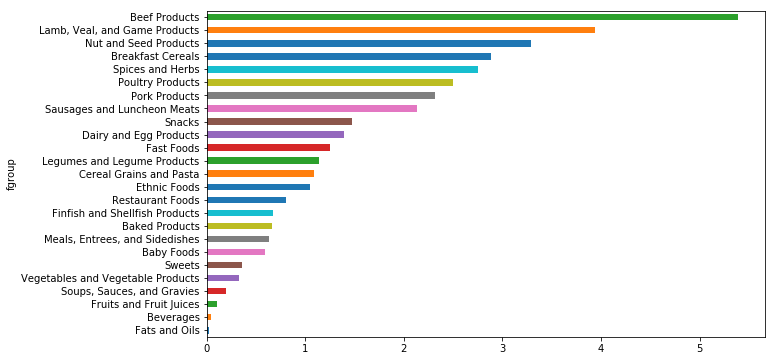

In [217]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [218]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
max_foods.food = max_foods.food.str[:50]

In [219]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [220]:
by_nutrient

In [221]:
max_foods

value  \
nutgroup    nutrient                                         
Amino Acids Alanine                                  8.009   
            Arginine                                 7.436   
            Aspartic acid                           10.203   
            Cystine                                  1.307   
            Glutamic acid                           17.452   
            Glycine                                 19.049   
            Histidine                                2.999   
            Hydroxyproline                           0.803   
            Isoleucine                               4.300   
            Leucine                                  7.200   
            Lysine                                   6.690   
            Methionine                               1.859   
            Phenylalanine                            4.600   
            Proline                                 12.295   
            Serine                                   4.600   
            Threonine                                3.300   
            Tryptophan                               1.600   
            Tyrosine                                 3.300   
            Valine                                   4.500   
Composition Adjusted Protein                        12.900   
            Carbohydrate, by difference            100.000   
            Fiber, total dietary                    79.000   
            Protein                                 88.320   
            Sugars, total                           99.800   
            Total lipid (fat)                      100.000   
            Water                                  100.000   
Elements    Calcium, Ca                           7364.000   
            Copper, Cu                              15.050   
            Fluoride, F                            584.000   
            Iron, Fe                                87.470   
            Magnesium, Mg                          781.000   
            Manganese, Mn                          133.000   
            Phosphorus, P                         9918.000   
            Potassium, K                         16500.000   
            Selenium, Se                          1917.000   
            Sodium, Na                           27360.000   
            Zinc, Zn                                90.950   
Energy      Energy                                3774.000   
Other       Alcohol, ethyl                          42.500   
            Ash                                     72.500   
            Beta-sitosterol                        426.000   
            Caffeine                              3680.000   
            Campesterol                            241.000   
            Cholesterol                           3100.000   
            Fatty acids, total monounsaturated      83.689   
            Fatty acids, total polyunsaturated      66.000   
            Fatty acids, total saturated            95.600   
            Fatty acids, total trans                20.578   
            Fatty acids, total trans-monoenoic      18.970   
            Fatty acids, total trans-polyenoic       3.543   
            Phytosterols                          9060.000   
            Stigmasterol                            38.000   
            Theobromine                           2634.000   
Sugars      Fructose                                42.830   
            Galactose                                5.620   
            Glucose (dextrose)                      57.000   
            Lactose                                 56.000   
            Maltose                                 10.430   
            Starch                                  73.770   
            Sucrose                                 99.800   
Vitamins    Betaine                                630.400   
            Carotene, alpha                      14251.000   
            Carotene, beta                       42891.000   
            Choline, to